In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#os library helps to play in the directories
import os

In [4]:
#path of the directories containing all the csv and json files
path = r"D:\doc\Udemy Data analysis Data\Youtube_project_shan_singh\additional_data"

In [5]:
#list of all the files in the directory
os.listdir(path)

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [6]:
#storing all the files 
files = os.listdir(path)

In [10]:
#extracting the csv files
csv_files = [files[i] for i in range(0,len(files),2)]

In [12]:
print(csv_files)

['CAvideos.csv', 'DEvideos.csv', 'FRvideos.csv', 'GBvideos.csv', 'INvideos.csv', 'JPvideos.csv', 'KRvideos.csv', 'MXvideos.csv', 'RUvideos.csv', 'USvideos.csv']


In [13]:
#creating the DataFrame with all the csv files concatinated
full_df = pd.DataFrame()

for file in csv_files:
    current_df = pd.read_csv(path + "/" + file,encoding = "iso-8859-1",error_bad_lines=False)
    
    current_df["country"] = file.split(".")[0][0:2]
    full_df = pd.concat([full_df,current_df])

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


In [15]:
full_df.shape

(375942, 17)

In [16]:
#we need to analyze the category
#in the above DataFrame we hace category id but not the name of that category
#lets check the unique category ids we have
full_df["category_id"].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [17]:
#the category name of every id is in a text file so lets extract it first
cat = pd.read_csv(r"D:\doc\Udemy Data analysis Data\Youtube_project_shan_singh/category_file.txt",sep=":")

In [18]:
#here we can see that the id has become the index and there is a single column name "Category_id Category_name"
cat

,Category_id Category_name
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging
22,People & Blogs


In [20]:
#reseting the index col will index the dataframe and category_id and category_name will be our columns
cat.reset_index(inplace = True)

In [21]:
#naming the columns
cat.columns = ["category_id","Category_name"]

In [22]:
cat.head()

,category_id,Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [25]:
#now we place the new category_id columns as the index and we get a proper dataFrame
cat.set_index("category_id",inplace = True)

In [26]:
cat.head()

,Category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [30]:
#converting the cat Dataframe to dictionary
dct = cat.to_dict()

In [32]:
#maping the dictionary to the DataFrame'scategory_id column
full_df["category_name"] = full_df["category_id"].map(dct["Category_name"])

In [33]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music


In [34]:
#creating the copy of the dataframe
df = full_df.copy()

In [35]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy


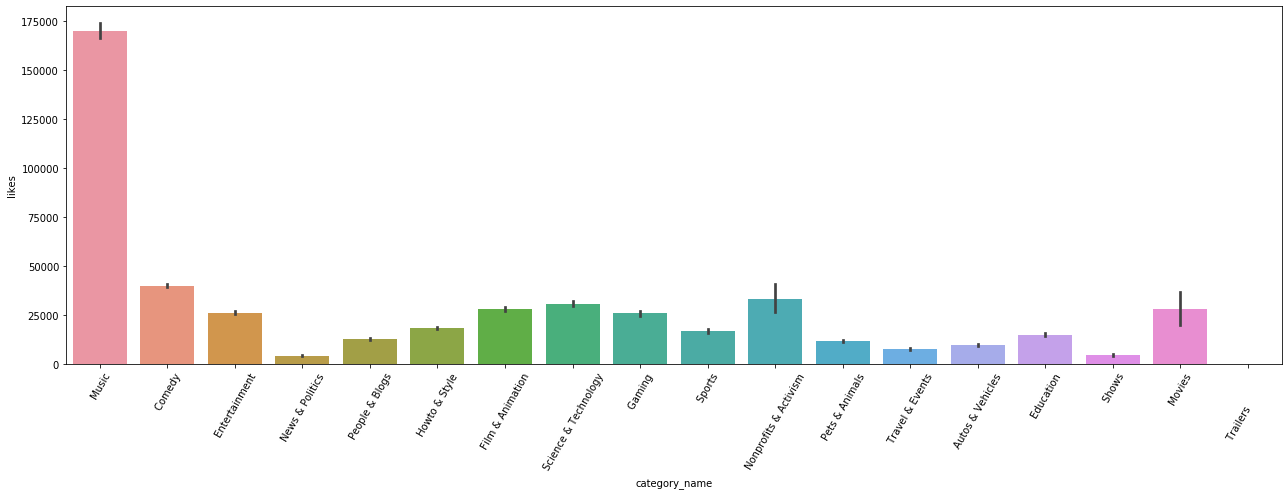

In [40]:
#lets see which category and their likes
plt.figure(figsize=(18,7))
sns.barplot(data=df,x="category_name",y="likes")
plt.xticks(rotation=60)
plt.tight_layout()

In [ ]:
#Cheking he like, dislike and commnet_count rate 

In [41]:
df["like_rate"] = (df["likes"]/df["views"])*100
df["dislike_rate"] = (df["dislikes"]/df["views"])*100
df["comment_count_rate"] = (df["comment_count"]/df["views"])*100

In [42]:
df[["like_rate","dislike_rate","comment_count_rate"]]

,like_rate,dislike_rate,comment_count_rate
0,4.589104,0.253051,0.733639
1,12.594873,0.166363,1.284185
2,4.575843,0.167292,0.256342
3,6.309630,0.094903,0.835851
4,4.874563,0.062887,0.253752
...,...,...,...
40944,2.263870,0.082166,0.157628
40945,5.635623,0.035875,0.369648
40946,4.507286,0.096770,0.374326
40947,3.408645,0.050275,0.231204


In [45]:
df[["likes",'dislikes','comment_count']].corr()

,likes,dislikes,comment_count
likes,1.00000,0.453710,0.794490
dislikes,0.45371,1.000000,0.705182
comment_count,0.79449,0.705182,1.000000


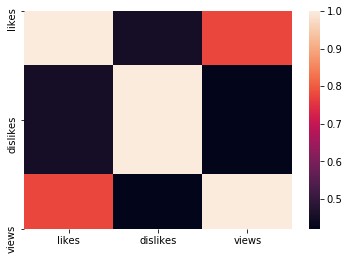

In [48]:
sns.heatmap(df[["likes",'dislikes',"views"]].corr())

In [ ]:
#which channel has the largest trending 

In [51]:
df.groupby("channel_title")["video_id"].count().sort_values(ascending=False)

channel_title
The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
LIGHTS - 001 jrny                       1
bangtanist                              1
LIGAMX Femenil                          1
LIGA COLOMBIANA OFICIAL                 1
Pavel Sidorik TV                        1
Name: video_id, Length: 37824, dtype: int64

In [53]:
#converting it to a DataFrame
df.groupby("channel_title")["video_id"].count().sort_values(ascending=False).to_frame().reset_index()

,channel_title,video_id
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [54]:
#renaming the video_id column to video count
df.groupby("channel_title")["video_id"].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={"video_id":"video_count"})

,channel_title,video_count
0,The Late Show with Stephen Colbert,984
1,WWE,804
2,Late Night with Seth Meyers,773
3,VikatanTV,763
4,TheEllenShow,743
...,...,...
37819,LIGHTS - 001 jrny,1
37820,bangtanist,1
37821,LIGAMX Femenil,1
37822,LIGA COLOMBIANA OFICIAL,1


In [55]:
#saving the final dataframe
video_count_df = df.groupby("channel_title")["video_id"].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={"video_id":"video_count"})

In [58]:
video_count_df.sample(5)

,channel_title,video_count
22462,Moha Officiel,2
28939,ã¨ããæ¼¢ã®ãã£ã³ãã«ããã,1
7258,Ð¡ÐµÐ¼ÐµÐ½ Ð¡Ð»ÐµÐ¿Ð°ÐºÐ¾Ð²,10
9362,RomeoElvisVEVO,7
20796,freememeskids,2


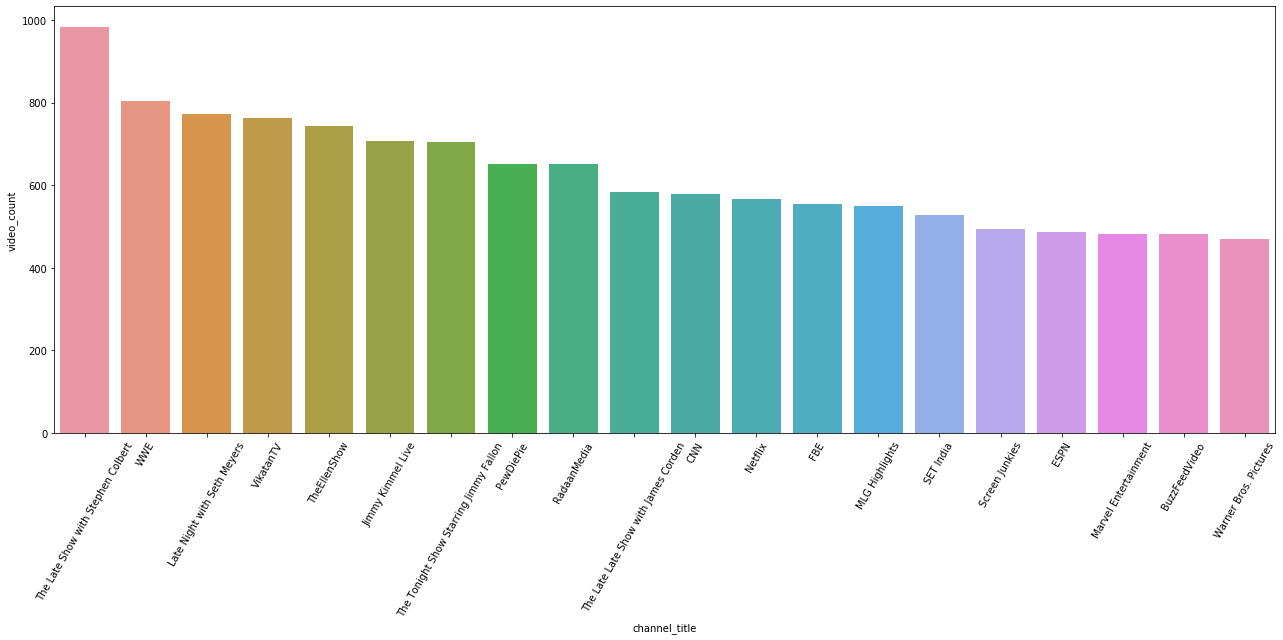

In [68]:
plt.figure(figsize=(18,9))
sns.barplot(data=video_count_df[0:20],x="channel_title",y="video_count")
plt.xticks(rotation=60)
plt.tight_layout()